# Introduction to Data Analysis of Covid-19

This project is divided into five parts
1. Basic Data analysis of World's covid-19 spread

2. Extensive analysis of India's covid-19 spread

    2.1 Top ten states with highest Active cases, Deaths, Recovered    
    
    2.2 Top ten states with highest mortality rate
    
    2.3 Trends of covid-19 in last 20 days of india and for some states
    
    2.4 Testing in India
    
    
3. SIR Model (Implementation from sratch)

4. Using calculus to map various important paramters related to covid-19 india spread

5. Analysis of Medical situation in india

# Importing libraries 

In [116]:
# !pip install plotly==4.7.1
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
from pylab import *
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime 
import sys
import plotly.io as pio
# pio.templates.default = 'plotly_dark'

# # Part-1 Basic Analysis of World's covid-19 spread

In [117]:
# Importing World's data and printing top 5 elements

Total_World = pd.read_csv('./Datasets/Total_World_covid-19.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
Total_World.head()

,Country,Confirmed,Deaths,Recovered,Active,Critical,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population
0,USA,1527664,90978.0,346389.0,1090297.0,16355.0,4619.0,275.0,11875580.0,35903.0,330769370.0
1,Russia,281752,2631.0,67373.0,211748.0,2300.0,1931.0,18.0,6916088.0,47394.0,145927122.0
2,Spain,277719,27650.0,195945.0,54124.0,1152.0,5940.0,591.0,3037840.0,64977.0,46752654.0
3,UK,243695,34636.0,NaN,NaN,1559.0,3592.0,511.0,2580769.0,38040.0,67843268.0
4,Brazil,241080,16122.0,94122.0,130836.0,8318.0,1135.0,76.0,735224.0,3462.0,212376810.0


In [118]:
# Importing India's data and printing top 5 states

Total_India = pd.read_csv("./Datasets/Total_India_covid-19.csv")
Daily_India = pd.read_csv("./Datasets/Daily_India_covid-19.csv")
Total_India.head()

,State,Statecode,Confirmed,Active,Recovered,Deaths,Last Updated,Latitude,Longitude
0,Maharashtra,MH,33053,24167,7688,1198,17/05/2020 23:26:23,19.7515,75.7139
1,Gujarat,GJ,11380,6222,4499,659,17/05/2020 21:47:24,22.2587,71.1924
2,Tamil Nadu,TN,11224,6973,4172,79,17/05/2020 19:13:23,11.1271,78.6569
3,Delhi,DL,9755,5405,4202,148,17/05/2020 13:13:24,28.7041,77.1025
4,Rajasthan,RJ,5202,2016,3055,131,17/05/2020 22:25:24,27.0238,74.2179


In [119]:
# Some informtion about total world's case in the form of python dictionary
TotalWD = {'Confirmed':Total_World['Confirmed'].sum(),
           'Active':Total_World['Active'].sum(),
           'Recovered':Total_World['Recovered'].sum(),
           'Deaths':Total_World['Deaths'].sum()
          }

print(TotalWD)

{'Confirmed': 4804765, 'Active': 2382491.0, 'Recovered': 1858189.0, 'Deaths': 316711.0}


In [120]:
TotalIND = {'Confirmed':Total_India['Confirmed'].sum(),
              'Active':Total_India['Active'].sum(),
              'Recovered':Total_India['Recovered'].sum(),
              'Deaths':Total_India['Deaths'].sum()
             }

print(TotalIND)

{'Confirmed': 95698, 'Active': 55872, 'Recovered': 36795, 'Deaths': 3025}


# Making Pie Chart of World's and India's data
https://plotly.com/python/pie-charts/

In [121]:
# Making a list of colors used
colors = ['darkorange', 'green', 'red']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

# Adding World's Pie chart
fig.add_trace(go.Pie(labels=[x[0] for x in TotalWD.items()][1:], 
                     values=[x[1] for x in TotalWD.items()][1:],
                     pull=[0.05, 0.03, 0.05],hole=0.6),row=1,col=1)

# Adding India's Pie chart
fig.add_trace(go.Pie(labels=[x[0] for x in TotalIND.items()][1:], 
                     values=[x[1] for x in TotalIND.items()][1:],
                     pull=[0.05, 0.03, 0.05],hole=0.6),row=1,col=2)

fig.update_traces(textinfo='label+percent', hoverinfo='percent+label+value',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(title = {'text':'Total Covid-19 Cases in World : '+ str([x[1] for x in TotalWD.items()][0])+ '  |  ' +
                          'Total Covid-19 Cases in India : '+ str([x[1] for x in TotalIND.items()][0]),
                          'y':0.9,'x':0.50,'xanchor': 'center','yanchor': 'top'
                          },
                  
                  annotations=[dict(text='World', x=0.155, y=0.5, font_size=40, showarrow=False),
                               dict(text='India', x=0.84, y=0.5, font_size=40, showarrow=False)],
                  
                  legend=dict(x=.9, y=-.18), legend_title_text='Date: 17-May-2020')
fig.show()

# Generating heatMap of the covid-19 cases

In [122]:
map = px.choropleth(Total_World, locations='Country', locationmode='country names',
                    color = 'Confirmed',
                    color_continuous_scale=px.colors.sequential.Rainbow_r, 
                    hover_name='Country',
                    hover_data = ['Confirmed','Active','Recovered','Deaths'])

map.update_layout(title={'text':'Total Confirmed Covid-19 Cases Worldwide',
                     'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
map.show()

# # Part-2 Analysis of India's covid-19 spread

# Growth curve of Covid-19 in India

In [10]:
total_c_fig = go.Figure()
total_c_fig.add_trace(go.Scatter(x=Daily_India['Date'],y=Daily_India['Total Confirmed'],
                                 mode='lines+markers',
                                 name='Daily Confirmed'))
total_c_fig.update_traces(showlegend=True,marker=dict(size=7,color='darkorange',
                                                      line=dict(color='#000000', width=1)))
total_c_fig.update_layout(title={'text': "Total Covid-19 Cases",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Date", yaxis_title="Total Coronavirus Cases",
                          legend=dict(x=.8, y=-.35))
total_c_fig.show()

# Finding

As evident from the growth curve, number of covid-19 case will go up in future, there is no question of 
flattening of curve in near future.

# Distribution of cases in India (% wise) (Confirmed, Deaths, Recovered)

In [11]:
confirmed = px.pie(Total_India, values='Confirmed', names='State', hover_data=['Statecode'])
confirmed.update_traces(textposition='inside', textinfo='percent+label',textfont_size=12)
confirmed.update_layout(title={'text':'Total Confirmed Covid-19 Cases in India',
                          'y':0.95,'x':0.37,'xanchor': 'center','yanchor': 'top'},
                        legend_title_text='States')
confirmed.show()

In [12]:
fig1 = go.Figure(data=[go.Bar(
            name='Confirmed',
            x=Total_India[:10].sort_values('Confirmed')['Confirmed'],
            y=Total_India[:10].sort_values('Confirmed')['State'],
            orientation='h')],
            )
fig1.update_traces(showlegend=True,marker=dict(color='darkorange',
                                               line=dict(color='#000000', width=1)))
fig1.update_layout(title={'text': "Confirmed Covid-19 Cases India (Top 10 States)",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Confirmed", yaxis_title="States",
                           legend=dict(x=.8, y=-.16))
fig1.show()

In [13]:
deaths = px.pie(Total_India,values='Deaths',names='State', hover_data=['Statecode'])
deaths.update_traces(textposition='inside', textinfo='percent+label',textfont_size=12)
deaths.update_layout(title={'text':'Total Deaths due to Covid-19 in India',
                     'y':0.95,'x':0.37,'xanchor': 'center','yanchor': 'top'},
                     legend_title_text='States')
deaths.show()

In [63]:
fig3 = go.Figure(data=[go.Bar(
            name='Deaths',
            x=Total_India[:10].sort_values('Deaths')['Deaths'],
            y=Total_India[:10].sort_values('Deaths')['State'],
            orientation='h')])
fig3.update_traces(showlegend=True,marker=dict(color='red',line=dict(color='#000000', width=1)))
fig3.update_layout(title={'text': "Deaths due to Covid-19 in India (Top 10 States)",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Deaths", yaxis_title="States",
                          legend=dict(x=.8, y=-.16))
fig3.show()

# Findings
As evident from above confirmed cases and deaths number, Maharastra is the worst hit country and then Gujrat. One notable differnce can be seen in the case of Tamil Nadu and Delhi, is that despite having more cases, deaths are very low. Why?

Reason: Better health care system, better management, high literacy rate

Above conclusion can be further solided by the below curve

In [72]:
Total_India['MortalityRate'] = (Total_India['Deaths']/Total_India['Confirmed'])*100
fig3 = go.Figure(data=[go.Bar(
            name='MortalityRate',
            x=Total_India[:10].sort_values('MortalityRate')['MortalityRate'],
            y=Total_India[:10].sort_values('MortalityRate')['State'],
            orientation='h')])
fig3.update_traces(showlegend=True,marker=dict(color='red',line=dict(color='#000000', width=1)))
fig3.update_layout(title={'text': "Mortality rate of Covid-19 in India (Top 10 States)",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Mortality Rate", yaxis_title="States",
                          legend=dict(x=.8, y=-.16))
fig3.show()

In [73]:
fig4 = go.Figure(data=[go.Bar(
            name='Active',
            x=Total_India[:10].sort_values('Recovered')['Recovered'],
            y=Total_India[:10].sort_values('Recovered')['State'],
            orientation='h')])
fig4.update_traces(showlegend=True,marker=dict(color='green',line=dict(color='#000000', width=1)))
fig4.update_layout(title={'text': "Recovered Covid-19 Cases India (Top 10 States)",
                          'y':0.9,'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                           xaxis_title="Recovered", yaxis_title="States",
                          legend=dict(x=.8, y=-.16))
fig4.show()

# Trends 

# Covid-19 trends in India (Last 20 days)

In [74]:
# Last 20 days trend in India
last_days_trend = go.Figure()
last_days_trend.add_trace(go.Scatter(x=Daily_India[-20:]['Date'],y=Daily_India[-20:]['Total Confirmed'],
                                 mode='lines+markers',
                                 name='Daily Confirmed',
                                 line=dict(color='darkblue', width=3)))
last_days_trend.add_trace(go.Scatter(x=Daily_India[-20:]['Date'],y=Daily_India[-20:]['Total Active'],
                                 mode='lines+markers',
                                 name='Daily Active',
                                 line=dict(color='darkorange', width=3)))
last_days_trend.add_trace(go.Scatter(x=Daily_India[-20:]['Date'],y=Daily_India[-20:]['Total Recovered'],
                                 mode='lines+markers',
                                 name='Daily Recovered',
                                 line=dict(color='green', width=3)))
last_days_trend.add_trace(go.Scatter(x=Daily_India[-20:]['Date'],y=Daily_India[-20:]['Total Deaths'],
                                 mode='lines+markers',
                                 name='Daily Deaths',
                                 line=dict(color='red', width=3)))
last_days_trend.update_traces(showlegend=True,marker=dict(size=7,line=dict(color='#000000', width=1)))
last_days_trend.update_layout(title={'text': "Covid-19 Trend In India (Last 20 Days)",
                                      'y':0.9,'x':0.50,
                                      'xanchor': 'center','yanchor': 'top'},
                                       xaxis_title="Date", yaxis_title="Daily Coronavirus Cases",
                                       legend_orientation="h",
                                       legend=dict(x=0.20, y=-.25))
last_days_trend.show()

# Findings
As we can clearly see, that deaths in India is relatively low compared to rest of the world, but confirmed cases are increasing at very much speed, so the approach of the govt. should be device mechanisms to curb the spread rate as possible.

# Covid-19 Top 8 States (Last 20 days)

In [75]:
daily_states_c = pd.read_csv('./Datasets/Daily_States_Confirmed_india.csv')
daily_states_r = pd.read_csv('./Datasets/Daily_States_Recovered_india.csv')
daily_states_d = pd.read_csv('./Datasets/Daily_States_Deaths_india.csv')

# Top 8 states trend
titles = ('Maharashtra','Gujarat','Tamil Nadu','Delhi','Rajasthan',
          'Madhya Pradesh','Uttar Pradesh','Andhra Pradesh')
daily_states = make_subplots(rows=4,cols=2,subplot_titles=titles,
                             column_widths=[0.5, 0.5],row_heights=[20,20,20,20])
# Maharashtra
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['MH'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkorange', width=3)),row=1, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['MH'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3)),row=1, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['MH'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3)),row=1, col=1)

# Gujarat
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['GJ'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkorange', width=3),showlegend=False),row=1, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['GJ'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=1, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['GJ'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=1, col=2)

# Tamil Nadu
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['TN'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkorange', width=3),showlegend=False),row=2, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['TN'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=2, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['TN'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=2, col=1)

# Delhi
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['DL'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkorange', width=3),showlegend=False),row=2, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['DL'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=2, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['DL'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=2, col=2)

#Rajasthan
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['RJ'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkorange', width=3),showlegend=False),row=3, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['RJ'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=3, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['RJ'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=3, col=1)

#Madhya Pradesh
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['MP'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkorange', width=3),showlegend=False),row=3, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['MP'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=3, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['MP'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=3, col=2)

#Uttar Pradesh
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['UP'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkorange', width=3),showlegend=False),row=4, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['UP'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=4, col=1)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['UP'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=4, col=1)

# Andra Pradesh
daily_states.add_trace(
    go.Scatter(x=daily_states_c[-20:]['Date'],y=daily_states_c[-20:]['AP'],
    mode='lines+markers',name='Daily Confirmed',line_shape='spline',
    line=dict(color='darkorange', width=3),showlegend=False),row=4, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_r[-20:]['Date'],y=daily_states_r[-20:]['AP'],
    mode='lines+markers',name='Daily Recovered',line_shape='spline',
    line=dict(color='green', width=3),showlegend=False),row=4, col=2)
daily_states.add_trace(
    go.Scatter(x=daily_states_d[-20:]['Date'],y=daily_states_d[-20:]['AP'],
    mode='lines+markers',name='Daily Deaths',line_shape='spline',
    line=dict(color='red', width=3),showlegend=False),row=4, col=2)


daily_states.update_traces(marker=dict(size=4,color='orange',
                                       line=dict(color='#000000', width=1)))

daily_states.update_layout(
    title={'text': "Covid-19 Top 8 States India (Last 20 Days)",
            'y':0.98,'x':0.50,'xanchor': 'center','yanchor': 'top'},
            height=1000,width=800,legend=dict(x=-0.1, y=1.1))

daily_states.update_xaxes(title_text="Date", row=4, col=1)
daily_states.update_xaxes(title_text="Date", row=4, col=2)

daily_states.update_yaxes(title_text="Cases", row=1, col=1)
daily_states.update_yaxes(title_text="Cases", row=2, col=1)
daily_states.update_yaxes(title_text="Cases", row=3, col=1)
daily_states.update_yaxes(title_text="Cases", row=4, col=1)

daily_states.show()

# Testing

In [77]:
import json
import requests
df_india_test = pd.io.json.json_normalize(requests.get('https://api.rootnet.in/covid19-in/stats/testing/history').json()['data']).rename(columns = {"totalIndividualsTested":"c_individualtest","totalPositiveCases":"c_positive","totalSamplesTested":"c_tests"})
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

In [78]:
df_india_test["p2t_ratio"]= np.round(100*df_india_test["c_positive"]/df_india_test["c_tests"],2)
df_india_test["positive"] = df_india_test["c_positive"].diff()
df_india_test["tests"] = df_india_test["c_tests"].diff()
df_india_test["p2t_ratio"]= np.round(100*df_india_test["positive"]/df_india_test["tests"],2)
df_india_test = df_india_test[1:]

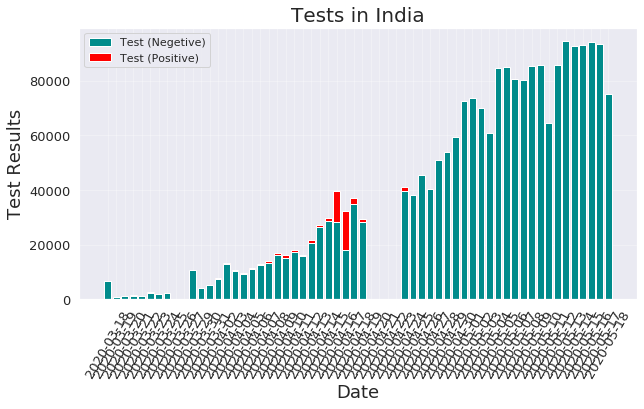

In [79]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.bar(df_india_test["day"],df_india_test["tests"].values[:],color="darkcyan",label="Test (Negetive)"+str())
plt.bar(df_india_test["day"],df_india_test["positive"].values[:],bottom=df_india_test["tests"].values[:]-df_india_test["positive"].values[:],color="Red",label="Test (Positive)")
plt.tick_params(size=5,labelsize = 13)
plt.tick_params(axis="x",size=5,labelsize = 13,labelrotation=60 )
plt.xlabel("Date",fontsize=18)
plt.ylabel("Test Results",fontsize=18)

plt.title("Tests in India",fontsize=20)
plt.grid(alpha=0.3)
plt.legend()

In [85]:
print('Total test done till now : {}'.format(df_india_test["c_tests"][-1:].values[0]))

print('Number of test per million: {}'.format(np.round(1000000*df_india_test["c_tests"][-1:].values[0]/1300000000,2)))

Total test done till now : 2302792.0
Number of test per million: 1771.38


In [88]:
# TODO
# Comparison of India vs Other countries testing

# #Part-3

# SIR Model

In this part we'll try to explain the SIR framework which is commonly used to model epidemics.

The framework divides the population into categories.

S: Susceptible is a group of people who are vulnerable to the infection. 

I: Infectious population is the group of people who can transmit the infection. 

R: Recovered(also called as removed) population is the group of people who are no longer infectious, this includes both the recovered population and people succumbed to the epidemic. A key assumption of the model is a recovered person generates immunity towards the epidemic.

The model also assumes that the population remains constant, i.e, there are no new births and no deaths on account of reasons other than the epidemic.


In [90]:
def sir_model(I0=0.01, beta=0.6, gamma=0.1):    
    """
    Function will take in initial state for infected population,
    Transmission rate (beta) and recovery rate(gamma) as input.
    
    """
    N=1          #Total population
    I=I0         #Initial state of I default value 1% of population
    S=N-I        #Initial state of S
    R=0          #Initial State of R
    C=I          #Initial State of Total Cases
    beta=beta    #Transmission Rate
    gamma=gamma  #Recovery Rate

    inf=[]       # List of Infectious population for each day
    day=[]       # Time period in day
    suc=[]       # List of Susceptible population for each day
    rec=[]       # List of Recovered population for each day
    conf=[]      # List of Total Cases population for each day
    
    for i in range(60):
        day.append(i)
        inf.append(I)
        suc.append(S)
        rec.append(R)
        conf.append(C)

        new_inf= I*S*beta       #New infections equation (1)   
        new_rec= I*gamma        #New Recoveries equation (2)
        
        I=I+new_inf-new_rec     #Total infectious population for next day
        S=S-new_inf             #Total infectious population for next day
        R=R+new_rec             #Total recovered population for next day
        C=C+new_inf             #Total confirmed cases for next day
    
    max_inf=round(np.array(inf).max()*100,2)     #Peak infectious population in percentage
    max_conf=round(np.array(conf).max()*100,2)   #Overal infected population in percentage
    
    print(f"Maximum Infectious population at a time :{max_inf}%")
    print(f"Total Infected population :{max_conf}%")
    
    #Visualizing the model
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,6))
    plt.title(f"SIR Model: R0 = {round(beta/gamma,2)}", fontsize=18)
    sns.lineplot(day,inf, label="Infected")
    sns.lineplot(day,suc,label="Succeptible")
    sns.lineplot(day,rec, label="Recovered")
    #sns.lineplot(day,conf, label="Confirmed") #Generally total infected population is not plotted 
    plt.legend()
    plt.xlabel("Time (in days)")
    plt.ylabel("Fraction of Population")
    plt.show()


In [91]:
def sir_model_betalist(I0=0.01, betalist=[0.5,0.8], gammalist=[0.15,0.25,0.5]):
    """
    Function takes Initial Infected Population(I0), list of transmission rates (betalist)
    and list of recovery rates(gammalist) as arguments.
    Plots Infectious population and Infected Population vs time for input parameters
    """
    
    for gamma in gammalist:
        # Plotting Infectious Population
        plt.figure(figsize=(10,6))
        sns.set(style="darkgrid")
        plt.title("SIR Model: Infectious Population", fontsize=18)
        
        for beta in betalist:
            N=1
            I=I0
            S=N-I
            gamma=gamma
            R0=beta/gamma
            
            inf=[]
            day=[]
            for i in range(50):
                day.append(i)
                inf.append(I)
                new_inf= I*S*beta
                new_rec= I*gamma
                I=I+new_inf-new_rec
                S=S-new_inf
            
            inf_max=round(np.array(inf).max()*100,1)
            sns.lineplot(day,inf, label=f"R0: {round(R0,2)} Peak: {inf_max}%")
            plt.legend()
        plt.show()
        
        # Plotting Total Infected Population
        plt.figure(figsize=(10,6))
        plt.title("SIR Model: Total Confirmed Cases", fontsize=18)       
        for beta in betalist:
            N=1
            I=I0
            S=N-I
            C=I
            gamma=gamma
            R0=beta/gamma
            day=[]
            conf=[]
            for i in range(50):
                day.append(i)
                conf.append(C)

                new_inf= I*S*beta
                new_rec= I*gamma
                I=I+new_inf-new_rec
                S=S-new_inf
                C=C+new_inf
            conf_max=round(np.array(conf).max()*100,1)
            sns.lineplot(day,conf, label=f"R0: {round(R0,2)} Total :{conf_max}%")
            plt.legend()
        plt.show()


Maximum Infectious population at a time :52.43%
Total Infected population :99.69%


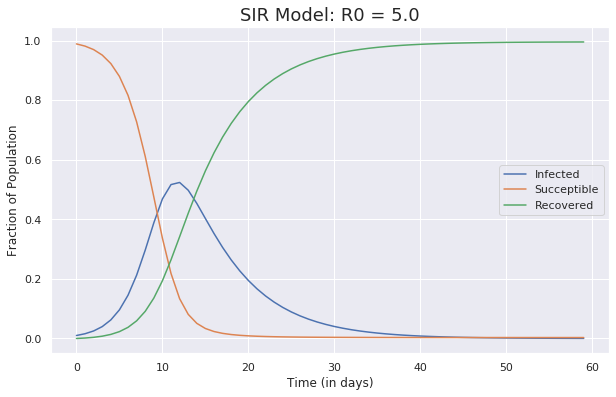

In [93]:
sir_model(beta=0.75,gamma=0.15)

Maximum Infectious population at a time :32.22%
Total Infected population :95.01%


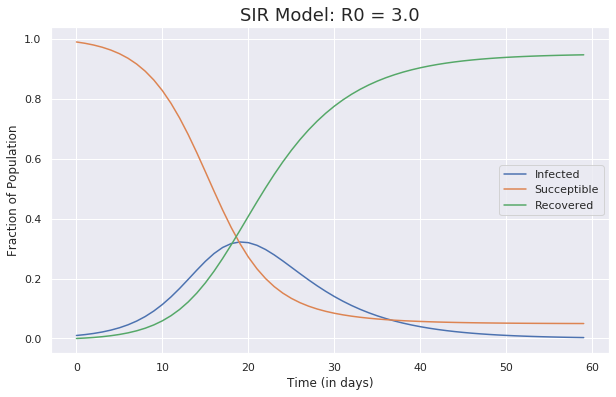

In [94]:
sir_model(beta=0.45, gamma=0.15)

Maximum Infectious population at a time :7.28%
Total Infected population :60.07%


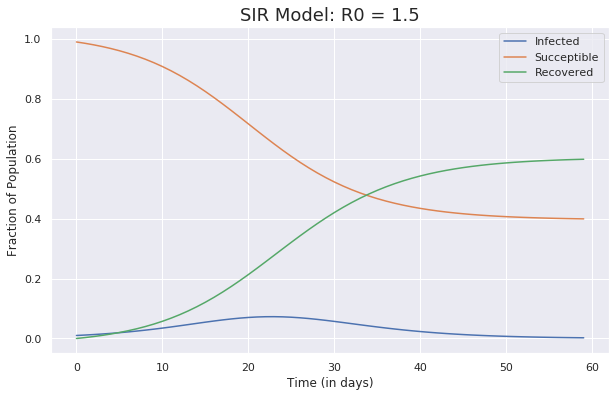

In [95]:
sir_model(beta=0.45,gamma=0.3)

# Flatten the curve
Flatten the Curve is a phrase which is very familier in these day, this is what we have done above. It can be observed that, by decreasing R0, we reduce the spread of the infection and the peak level of infected population. Decreasing R0 will also delay the time for peak level of infection, buying us valuable time to prepare tackle the infection effectively.

Let's now check how the peak level of infection and the extent of infection varies with R0.

As R0 decreases, the curve for infectious population flattens out. When R0 is 6, more than 60% of the population is infections by around 8th day, whereas when R0 is 2, maximum infectious population is 16.7% by around 24th day. That mean reduction in R0 from 6 to 2 gives us additional two weeks to prepare to tackle the peak infection. It can also be observed that the extent of infection also decreases with reduction in R0. When R0=6, total population gets infected whereas when R0=2, 20% of the population remains uninfected when the epidemic is over.

Despite COVID-19 being a relatively less fatal infection, it wreaked havoc all over the world as it quickly spread and caught many countries unprepared, overwhelming their health infrastructure. Health infrastructure is said to be overwhelmed when the number of infectious population is above the total beds available at the hospitals. Yes, the health infrastructure could be ramped up rapidly by converting other infrastructure to makeshift hospitals and calling retired health professionals back into duty etc. as followed by many countries but it won’t be able to keep up with if the cases increase exponentially. The faster the infection curve rises, the quicker the local health care system gets overloaded beyond its capacity to treat people. As we're seeing in Italy, Spain, United States etc. more and more new patients may be forced to go without ICU beds, and more and more hospitals may run out of the basic supplies they need to respond to the outbreak.

It is in this context "Flattening the Curve" becomes very important.

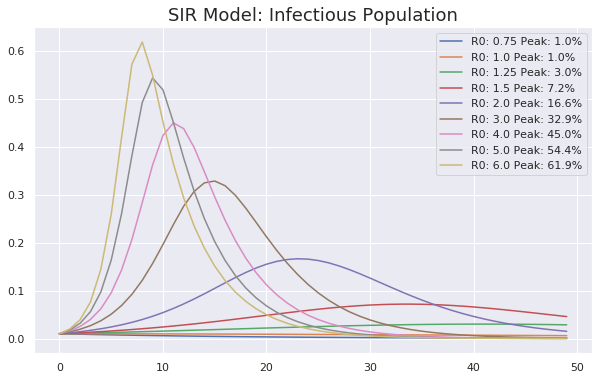

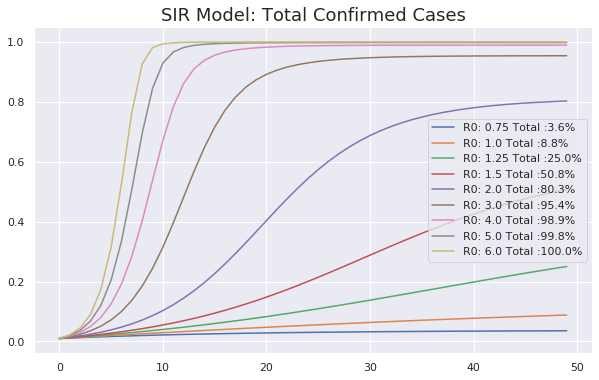

In [96]:
sir_model_betalist(I0=0.01,betalist=[0.15,0.2, 0.25,0.30,0.4,0.6,0.8,1,1.2], gammalist=[0.20])

# Findings
How to Flatten the Curve
The curve can be flattened out by reducing R0 which can be achieved by:

Reducing susceptible population (S0),
Reducing transmission rate (beta)
Increasing recovery rate (gamma)

Reducing Susceptible population
The best method for decreasing susceptible population is vaccination, however no vaccination is available for COVID-19. Overall susceptible population can be contained in a region level by implementing travel restrictions, lock-downs etc.
Increasing recovery rate (gamma)

Increasing recovery rate depends on health infrastructure and treatment methods. Significant improvement in this area is both time consuming and capital intensive.
Reduction in transmission rate

Transmission rate depends on the number of persons from susceptible population an infected individual comes into contact (contact rate, k) and probability that a contact becomes infected (transmissibility, t).
Reduce the contact rate by social distancing measures like closing of schools, offices etc., suspension of public transport, self-isolation of susceptible individuals, quarantine etc.
Reduce the transmissibility by improving personal and environmental hygiene by frequent hand washing, covering nose and mouth while sneezing, disinfecting environment, use of face mask etc.

# Some important parameters

In [18]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "./Datasets/img/logistic_curve.png", width=600, height=600)

In [19]:
Image(url= "./Datasets/img/eq.png", width=300, height=300)

In [20]:
Image(url= "./Datasets/img/eq2.png", width=300, height=600)

Logistic Function
A logistic function or logistic curve is an equation of the form:LogisticFunction.png
where
* x_0 = the inflection point,
* N = the curve's maximum value, and
* k = growth rate or steepness of the curve.
For reference: https://en.wikipedia.org/wiki/Logistic_function.


Actually, the logistic function is just a solution for the following first-order, non-linear ordinary differential equation called the Logistic Differential Equation where f(x_0) = N/2:LogisticEqn.png
From the differential equation, stability of solutions and equilibria can be explored. However, this may not be directly helpful in predicting confirmed cases, so let's keep things simple for now and just look at the growth metrics.
The Analysis
Now that we have seen the math, let's explore the following growth metrics for the confirmed cases for each country:
* Growth Factor
* Growth Ratio
* Growth Rate
* 2nd Derivative
The growth factor on day N is the number of confirmed cases on day N minus confirmed cases on day N-1 divided by the number of confirmed cases on day N-1 minus confirmed cases on day N-2.
The growth ratio on day N is the number of confirmed cases on day N divided by the number of confirmed cases on day N-1.
The growth rate is simply the first derivative.
We will use these growth metrics to gain insight into which countries may have already hit their inflection points. For example, if a country's growth factor has stabilized around 1.0 then this can be a sign that that country has reached it's inflection point. We will then use curve fitting to fit a logistic curve (similar to the one above) to the number of confirmed cases for each country. This may help us predict if a country has hit their inflection point, and therefore when they will reach a possible maximum number of confirmed cases.
Interestingly, the growth factor just tells us the curvature (from Calculus!) of the data. If we take our data and take the 2nd derivative, basically all it is telling us is whether the cases are growing at an accelerating or decelerating rate. From calculus you may remember we use the 2nd derivative test to test for concavity and find saddle points. The inflection point is where the curve changes concavity. We can look at these growth metrics
The bigger picture will be to correlate this with preventative efforts such as quarentines, closing of schools, etc. It will also be interesting to see growth factor as a feature in a ML model.

# #Part-4

# Important parameters regarding covid-19 spread

In [97]:
global_data = pd.read_csv("./Datasets/covid_19_data.csv")

def smoother(inputdata,w,imax):
    data = 1.0*inputdata
    data = data.replace(np.nan,1)
    data = data.replace(np.inf,1)
    #print(data)
    smoothed = 1.0*data
    normalization = 1
    for i in range(-imax,imax+1):
        if i==0:
            continue
        smoothed += (w**abs(i))*data.shift(i,axis=0)
        normalization += w**abs(i)
    smoothed /= normalization
    return smoothed
# function to compute growth factor
def growth_factor(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    confirmed_iminus2 = confirmed.shift(2, axis=0)
    return (confirmed-confirmed_iminus1)/(confirmed_iminus1-confirmed_iminus2)
#function to compute growth ratio
def growth_ratio(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    return (confirmed/confirmed_iminus1)

# We don't need a function for growth rate since we can use the np.gradient() function.

# This is a function which plots (for in input country) the active, confirmed, and recovered cases, deaths, and the growth factor.
def plot_country_active_confirmed_recovered_growth_metrics(country):
    
    # Plots Active, Confirmed, and Recovered Cases. Also plots deaths.
    country_data = global_data[global_data['Country/Region']==country]
    table = country_data.drop(['SNo','Province/State', 'Last Update'], axis=1)
    table['ActiveCases'] = table['Confirmed'] - table['Recovered'] - table['Deaths']
    table2 = pd.pivot_table(table, values=['ActiveCases','Confirmed', 'Recovered','Deaths'], index=['ObservationDate'], aggfunc=np.sum)
    table3 = table2.drop(['Deaths'], axis=1)
   
    # Growth Factor
    w = 0.5
    table2['GrowthFactor'] = growth_factor(table2['Confirmed'])
    table2['GrowthFactor'] = smoother(table2['GrowthFactor'],w,5)

    # 2nd Derivative
    table2['2nd_Derivative'] = np.gradient(np.gradient(table2['Confirmed'])) #2nd derivative
    table2['2nd_Derivative'] = smoother(table2['2nd_Derivative'],w,7)


    #Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
    table2['GrowthRatio'] = growth_ratio(table2['Confirmed'])
    table2['GrowthRatio'] = smoother(table2['GrowthRatio'],w,5)
    
    #Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
    table2['GrowthRate']=np.gradient(np.log(table2['Confirmed']))
    table2['GrowthRate'] = smoother(table2['GrowthRate'],0.5,3)
    
    # horizontal line at growth rate 1.0 for reference
    x_coordinates = [1, 100]
    y_coordinates = [1, 1]
    #plots
    table2['Deaths'].plot(title='Deaths')
    plt.show()
    table3.plot() 
    plt.show()
#     table2['GrowthFactor'].plot(title='Growth Factor')
#     plt.plot(x_coordinates, y_coordinates) 
#     plt.show()
    table2['2nd_Derivative'].plot(title='2nd_Derivative')
    plt.show()
    table2['GrowthRatio'].plot(title='Growth Ratio')
    plt.plot(x_coordinates, y_coordinates)
    plt.show()
    table2['GrowthRate'].plot(title='Growth Rate')
    plt.show()

    
   # import plotly.express as px
   # table3 = table3.melt(id_vars="ObservationDate", value_vars=['ActiveCases','Confirmed','Recovered'],
   #              var_name='case', value_name='count')
   # table3.reindex()
   # fig = px.area(table3, x="ObservationDate", y="count", color='case',
   #              title='Confirmed Cases', color_discrete_sequence = ['cyan', 'red', 'orange'])
   # fig.show()

    return 

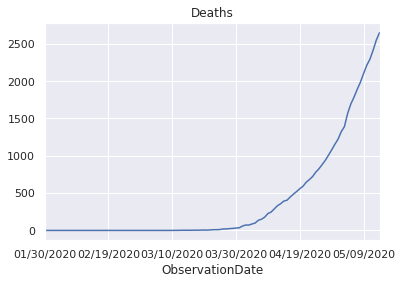

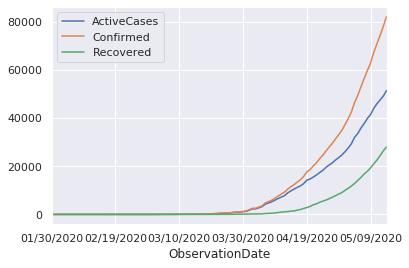

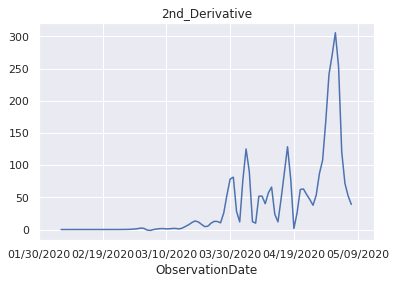

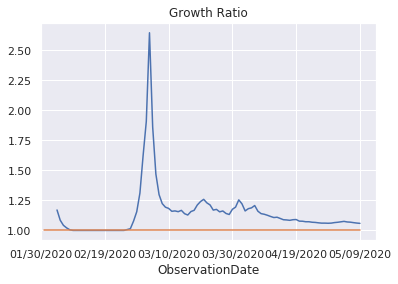

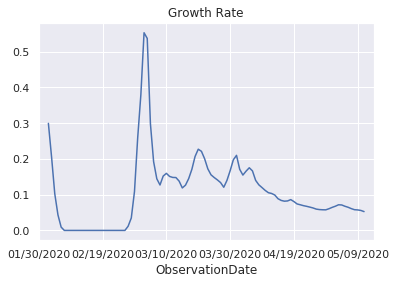

In [98]:
# plot_country_active_confirmed_recovered_growth_metrics('India')
plot_country_active_confirmed_recovered_growth_metrics('India')
# Total_World.head()

In [99]:
india_data = global_data[global_data['Country/Region'] == 'India']

In [100]:
india_data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
23233,23234,05/10/2020,NaN,India,2020-05-11 02:32:30,67161.0,2212.0,20969.0
23556,23557,05/11/2020,NaN,India,2020-05-12 03:32:27,70768.0,2294.0,22549.0
23879,23880,05/12/2020,NaN,India,2020-05-13 03:32:26,74292.0,2415.0,24420.0
24202,24203,05/13/2020,NaN,India,2020-05-14 03:32:28,78055.0,2551.0,26400.0
24525,24526,05/14/2020,NaN,India,2020-05-15 02:33:02,81997.0,2649.0,27969.0


In [101]:
from scipy.optimize import curve_fit

# We want number of confirmed for each date for each country
#country_data = global_data[global_data['Country/Region']=='Mainland China']
country_data = global_data[global_data['Country/Region'] == 'India']
country_data = country_data[country_data['ObservationDate'] <= "05/15/2020"]
country_data = country_data.drop(['SNo','Province/State', 'Last Update'], axis=1)
country_data = pd.pivot_table(country_data, values=['Confirmed', 'Recovered','Deaths'], index=['ObservationDate'], aggfunc=np.sum)
country_data.tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
05/10/2020,67161.0,2212.0,20969.0
05/11/2020,70768.0,2294.0,22549.0
05/12/2020,74292.0,2415.0,24420.0
05/13/2020,78055.0,2551.0,26400.0
05/14/2020,81997.0,2649.0,27969.0


In [102]:

# we will want x_data to be the number of days since first confirmed and the y_data to be the confirmed data. This will be the data we use to fit a logistic curve
x_data = range(len(country_data.index))
y_data = country_data['Confirmed']

def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=50000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(range(0,160), k, x_0, ymax)
print(k, x_0, ymax)
#print(y_fitted)
y_data.tail()

0.08873910089857391 105.37424831098026 165332.2080472253


ObservationDate
05/10/2020    67161.0
05/11/2020    70768.0
05/12/2020    74292.0
05/13/2020    78055.0
05/14/2020    81997.0
Name: Confirmed, dtype: float64

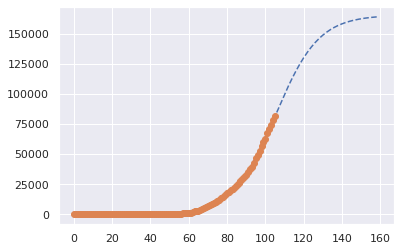

In [103]:
# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,160), y_fitted, '--', label='fitted')
ax.plot(x_data, y_data, 'o', label='Confirmed Data')

# Findings

Notice that this predicts the India is about to hit the inflection point around day 118 and this model predicts that the number of confirmed cases will be over around 1,50,000 cases. This is certainly underestimating. We should also consider that the number of positive undiagnosed plus positive diagnosed cases in each country is likely to be much higher than the number of confirmed cases. This, along with the fact that most countries aren't testing enough, means the mortality rate is likely inflated since the number of actual positive cases in each population is likely considerably higher than confirmed cases.

# #Part-5
# Analysis on medical situations in India

In [129]:
age_details = pd.read_csv('./Datasets/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('./Datasets/covid_19_india.csv')
hospital_beds = pd.read_csv('./Datasets/HospitalBedsIndia.csv')
individual_details = pd.read_csv('./Datasets/IndividualDetails.csv')
ICMR_details = pd.read_csv('./Datasets/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('./Datasets/ICMRTestingLabs.csv')
state_testing = pd.read_csv('./Datasets/StatewiseTestingDetails.csv')
population = pd.read_csv('./Datasets/population_india_census2011.csv')

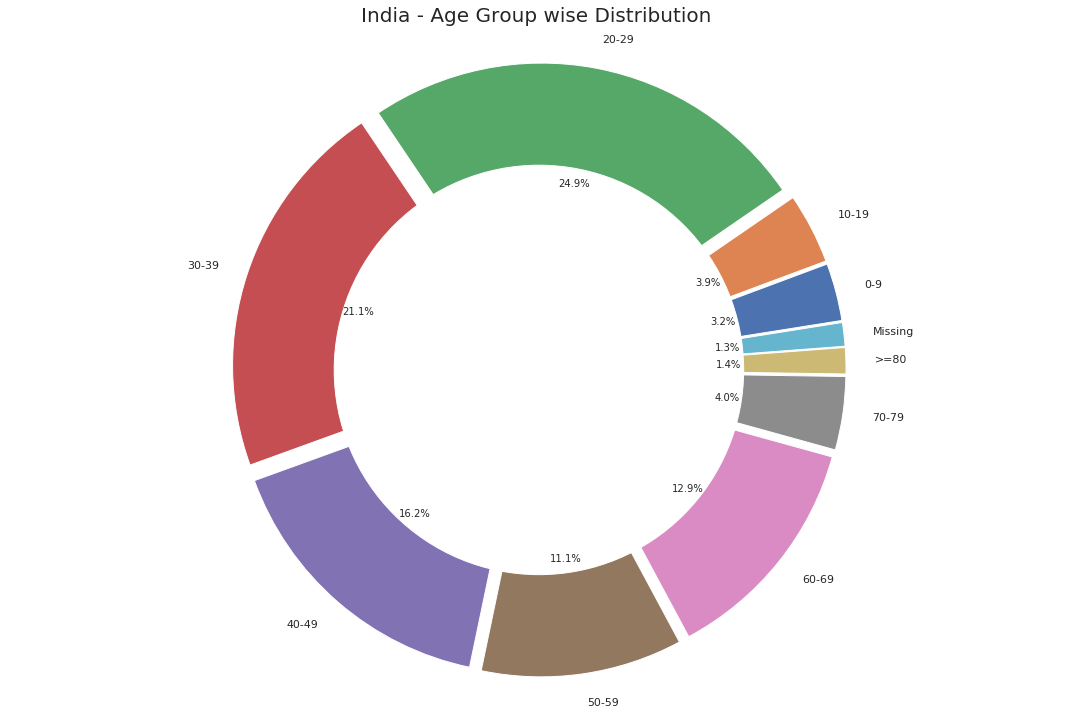

In [130]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

We could see that the age group <40 is the most affected which is against the trend which says elderly people are more at risk of being affected. Only 17% of people >60 are affected.

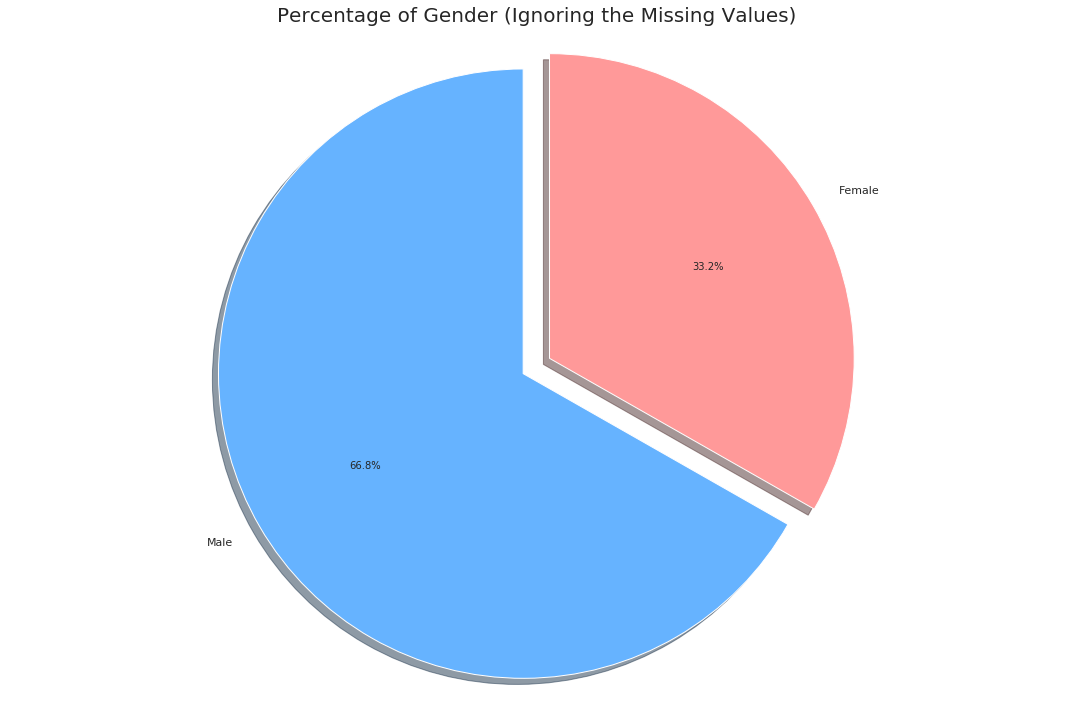

In [132]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()

Men are the most affected accounting to 67%. But we have ~80% data missing.

In [133]:
state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])


,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
20,Maharashtra,29100,1068,6564,21468,3.67,22.56
30,Tamil Nadu,10108,71,2599,7438,0.7,25.71
10,Gujarat,9931,606,4035,5290,6.1,40.63
8,Delhi,8895,123,3518,5254,1.38,39.55
29,Rajasthan,4727,125,2677,1925,2.64,56.63
19,Madhya Pradesh,4595,239,2283,2073,5.2,49.68
34,Uttar Pradesh,4057,95,2165,1797,2.34,53.36
36,West Bengal,2461,225,829,1407,9.14,33.69
1,Andhra Pradesh,2307,48,1252,1007,2.08,54.27
28,Punjab,1935,32,305,1598,1.65,15.76


In [135]:
hospital_beds =hospital_beds.drop([36])
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

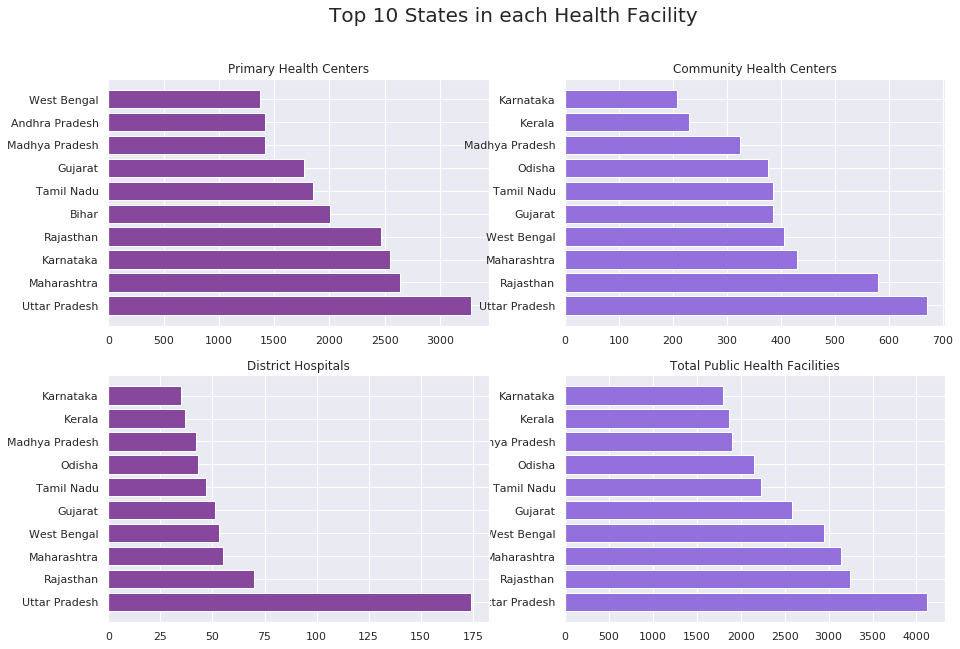

In [136]:
  hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')
top_10_primary = hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')
top_10_community = hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')
top_10_district_hospitals = hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')
top_10_public_facility = hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10_public_beds = hospital_beds.nlargest(10,'NumPublicBeds_HMIS')

plt.figure(figsize=(15,10))
plt.suptitle('Top 10 States in each Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Primary Health Centers')
plt.barh(top_10_primary['State/UT'],top_10_primary['NumPrimaryHealthCenters_HMIS'],color ='#87479d');

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'],top_10_community['NumCommunityHealthCenters_HMIS'],color = '#9370db');

plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['State/UT'],top_10_public_facility['TotalPublicHealthFacilities_HMIS'],color='#9370db');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'],top_10_district_hospitals['NumDistrictHospitals_HMIS'],color = '#87479d');

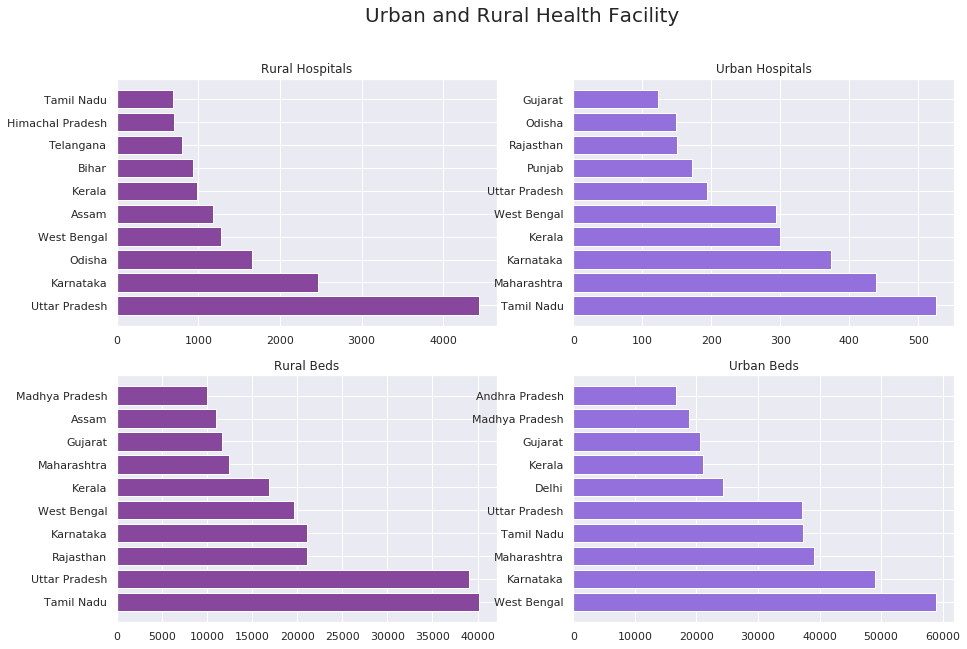

In [137]:
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

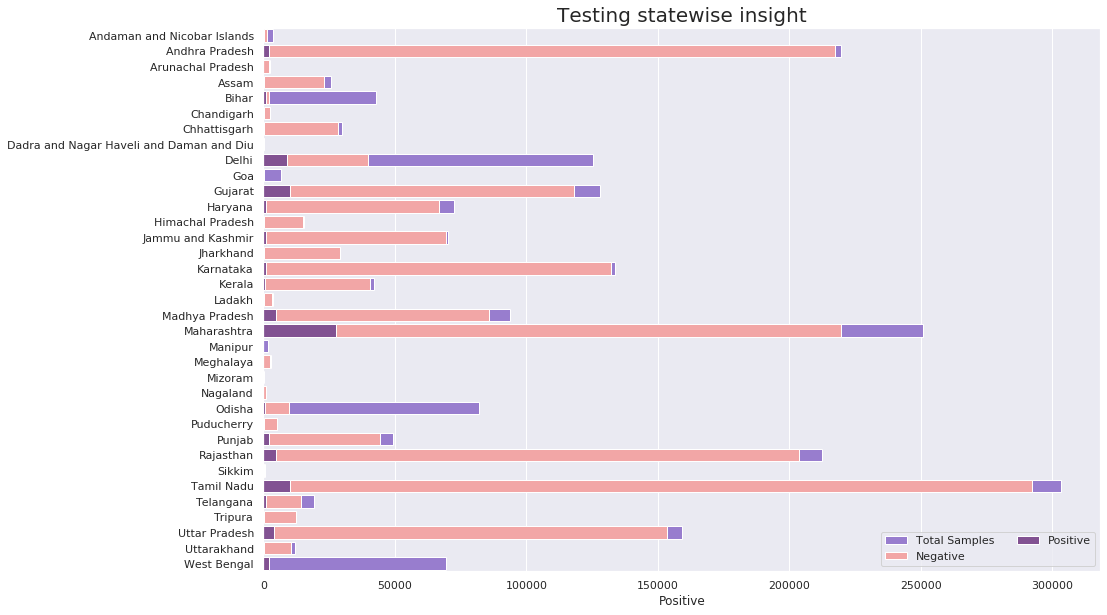

In [138]:
state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#9370db')
sns.barplot(x='Negative', y=state_names, data=state_test,label='Negative', color= '#ff9999')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='#87479d')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);

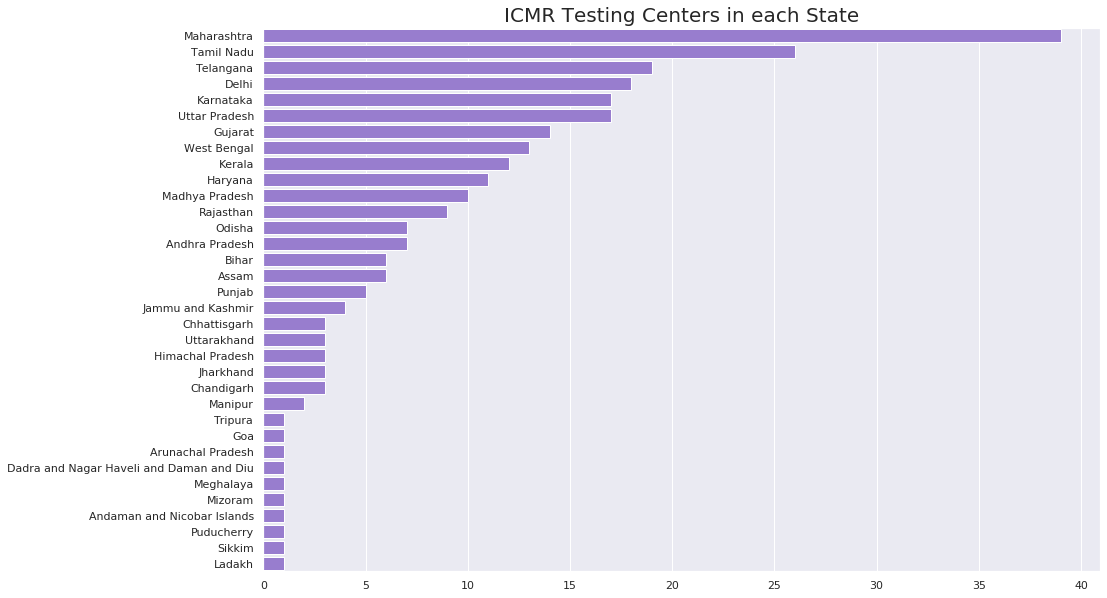

In [139]:
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#9370db');

# Things to TODO

1. Analysis of mortality rate with different diseases and condition
2. Predicting future cases using advanced model
3. Economic impact of Covid-19